In [75]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_scores.data"

df = pd.read_csv(in_fh)


In [76]:
# remove columns with no information
df_clean = df[df.Identity != 'X']
df_clean

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes


Identity                object
Percent Identity       float64
Avg Blosum62 Score     float64
Avg Frequency Score    float64
Fraction Aligned       float64
Fraction Disordered    float64
dtype: object

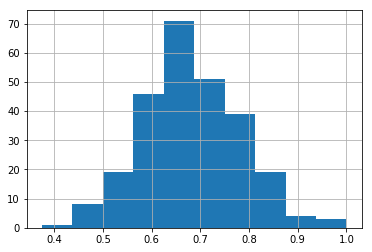

In [104]:
df_clean['Avg Frequency Score'].hist()

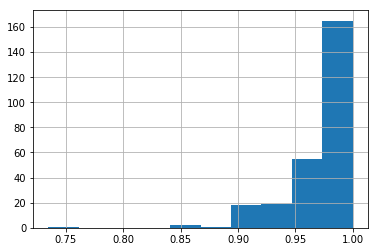

In [107]:
df_clean['Fraction Aligned'].hist()

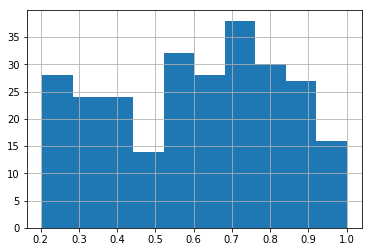

In [108]:
df_clean['Fraction Disordered'].hist()

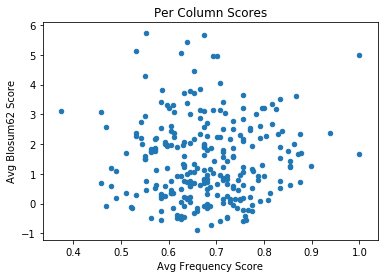

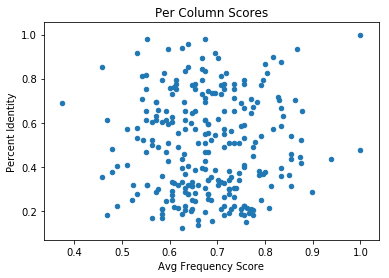

In [93]:
# matplotlib backend to plot dataframe
df_clean.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores')

Disorder Split at 50% for same scores above

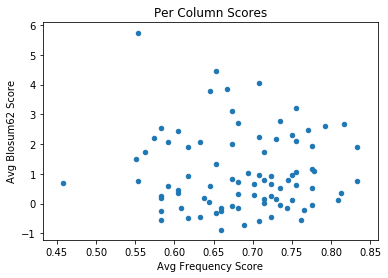

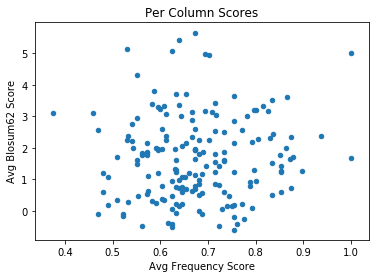

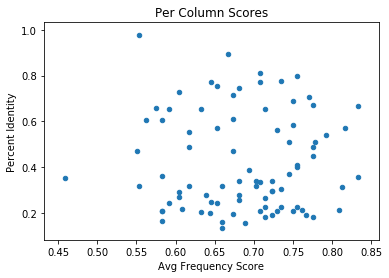

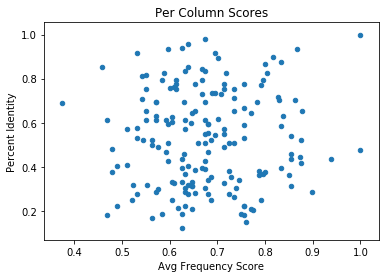

In [103]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

df_clean_dis1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean_dis1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores')
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores')

Attempting to filter by fraction aligned produced no differences

In [78]:
print(min(df_clean['Fraction Aligned']))

0.7346938775510204


In [79]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [80]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [81]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
336,x,0.361111,-0.561905,0.583333,0.734694,0.222222


In [105]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
0,M,1.000000,5.000000,1.000000,0.918367,1.000000
63,R,0.318182,-0.159619,0.522727,0.897959,1.000000
64,I,0.600000,3.008081,0.644444,0.918367,1.000000
65,N,0.760870,3.321739,0.608696,0.938776,0.978261
66,T,0.695652,1.973913,0.630435,0.938776,0.891304
67,N,0.978261,5.652174,0.673913,0.938776,0.847826
68,V,0.282609,1.058937,0.652174,0.938776,0.782609
69,S,0.319149,0.473636,0.553191,0.959184,0.765957
70,A,0.510638,1.962997,0.595745,0.959184,0.765957
71,L,0.446809,1.658649,0.872340,0.959184,0.765957


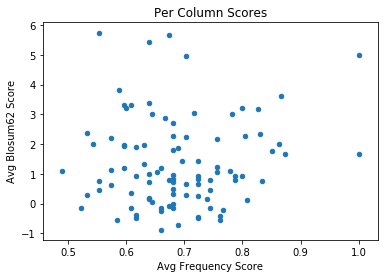

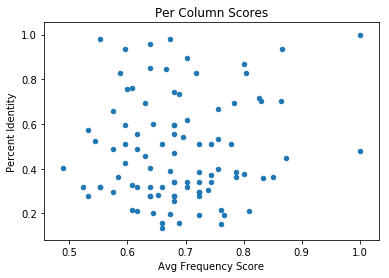

In [99]:
df_clean_100.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean_100.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores')

# Plot Scores with Disorder

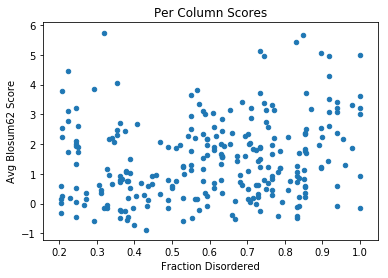

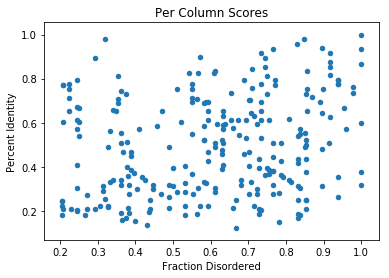

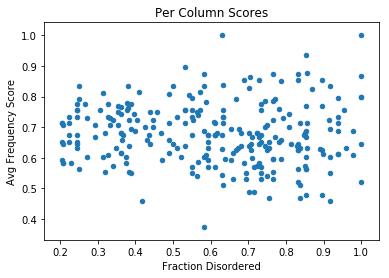

In [66]:
df_clean.plot.scatter('Fraction Disordered', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Avg Frequency Score', title='Per Column Scores')

# Fraction Disorder Filters

In [67]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
df_clean_25d

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
208,T,0.306122,0.528912,0.734694,1.000000,0.244898
209,T,0.795918,3.208333,0.755102,1.000000,0.244898
211,F,0.755102,4.445578,0.653061,1.000000,0.224490
212,N,0.714286,3.103741,0.673469,1.000000,0.224490
213,G,0.571429,1.345238,0.653061,1.000000,0.244898
214,I,0.204082,-0.458333,0.632653,1.000000,0.244898
215,K,0.612245,1.989796,0.673469,1.000000,0.244898
216,L,0.673469,1.924320,0.775510,1.000000,0.244898
217,L,0.775510,2.769558,0.734694,1.000000,0.224490
218,D,0.244898,0.603741,0.591837,1.000000,0.204082


In [68]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
df_clean_50d

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
200,D,0.265306,0.795068,0.714286,1.000000,0.489796
201,E,0.653061,2.067177,0.591837,1.000000,0.469388
202,I,0.571429,2.689626,0.816327,1.000000,0.408163
203,D,0.469388,1.500000,0.551020,1.000000,0.387755
204,R,0.469388,0.840986,0.673469,1.000000,0.367347
205,I,0.653061,2.063776,0.632653,1.000000,0.346939
206,A,0.489796,1.174320,0.775510,1.000000,0.326531
207,N,0.224490,0.625850,0.755102,1.000000,0.306122
343,I,0.333333,0.950355,0.708333,0.979592,0.333333
344,G,0.744681,2.697502,0.680851,0.959184,0.361702


In [69]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
df_clean_75d

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
72,N,0.276596,0.001850,0.680851,0.959184,0.723404
73,A,0.595745,1.797410,0.680851,0.959184,0.723404
74,Q,0.468085,0.493062,0.680851,0.959184,0.702128
76,R,0.404255,1.086957,0.489362,0.959184,0.702128
77,N,0.276596,0.141536,0.638298,0.959184,0.702128
78,L,0.702128,2.323774,0.829787,0.959184,0.702128
128,R,0.395833,0.615248,0.666667,0.979592,0.729167
129,G,0.729167,3.141844,0.708333,0.979592,0.750000
131,N,0.187500,0.317376,0.583333,0.979592,0.729167
132,Q,0.395833,0.485816,0.625000,0.979592,0.750000


In [70]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
df_clean_100d

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
0,M,1.000000,5.000000,1.000000,0.918367,1.000000
63,R,0.318182,-0.159619,0.522727,0.897959,1.000000
64,I,0.600000,3.008081,0.644444,0.918367,1.000000
65,N,0.760870,3.321739,0.608696,0.938776,0.978261
66,T,0.695652,1.973913,0.630435,0.938776,0.891304
67,N,0.978261,5.652174,0.673913,0.938776,0.847826
68,V,0.282609,1.058937,0.652174,0.938776,0.782609
69,S,0.319149,0.473636,0.553191,0.959184,0.765957
70,A,0.510638,1.962997,0.595745,0.959184,0.765957
71,L,0.446809,1.658649,0.872340,0.959184,0.765957
